In [27]:
%matplotlib notebook

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib.dates as mdates
import datetime
import math
from scipy import optimize

In [29]:
1+1 

2

In [30]:
from github import Github

In [31]:
#g = Github("username", "password")

In [32]:
repo = g.get_repo("CSSEGISandData/COVID-19")

In [33]:
contents = repo.get_contents("")

In [34]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


In [35]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


In [36]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [37]:
count = 1
for index in contents:
    url = index.download_url
    print(count, url)
    count = count + 1

1 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
2 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
3 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
4 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
5 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
6 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
7 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
8 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_d

In [38]:
import bs4 as bs
import urllib.request

In [39]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv


In [40]:
print(files[len(files)-1])

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
45001,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.22333378,-82.46170658,4,0,0,0,"Abbeville, South Carolina, US"
22001,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295064899999996,-92.41419698,47,1,0,0,"Acadia, Louisiana, US"
51001,Accomack,Virginia,US,2020-04-01 21:58:49,37.76707161,-75.63234615,7,0,0,0,"Accomack, Virginia, US"
16001,Ada,Idaho,US,2020-04-01 21:58:49,43.4526575,-116.24155159999998,195,3,0,0,"Ada, Idaho, US"
19001,Adair,Iowa,US,2020-04-01 21:58:49,41.33075609,-94.47105874,1,0,0,0,"Adair, Iowa, US"
29001,Adair,Missouri,US,2020-04-01 21:58:49,40.19058551,-92.60078167,3,0,0,0,"Adair, Missouri, US"
40001,Adair,Oklahoma,US,2020-04-01 21:58:49,35.88494195,-94.65859267,8,0,0,0,"Adair, Oklahoma, US"
08001,Adams,Colorado,US,2020-04-01 21:58:49,39.87432092,-104.3362578,181,2,0,0,"Adams, Colorado, US"
17001,Adams,Illinois,US,2020-04-01 21:58:49,39.98815591,-91.1878681

In [41]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [42]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
rec_dict      = {}
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does the recovered field have a number, sometimes it is '', empty
                if(len(data[recovered]) > 0):
                    # Is the number greater than zero
                    if (int(data[recovered]) > 0):
                        rec_dict.setdefault(key, []).append([sample,int(data[recovered])])
                    else:
                        rec_dict.setdefault(key, []).append([sample,0]) 
                else:
                    rec_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


In [43]:
state_conf_dict    = {}
state_death_dict   = {}

country_conf_dict  = {}
country_death_dict = {}
country_rec_dict   = {}
country_perc_dict  = {} 

Dcountry_conf_dict  = {}
Dcountry_death_dict = {}
Dcountry_rec_dict   = {}
Dcountry_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for city in conf_dict:
    state_conf_dict[city]   = np.zeros(days)
    state_death_dict[city]  = np.zeros(days)

for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_rec_dict[CNT]   = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    Dcountry_conf_dict[CNT]  = np.zeros(days-1)  
    Dcountry_death_dict[CNT] = np.zeros(days-1)
    Dcountry_rec_dict[CNT]   = np.zeros(days-1)
    Dcountry_perc_dict[CNT]  = np.zeros(days-1)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
     
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            rs = rec_dict[city][i][0]
            rv = rec_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            country_rec_dict[CNT][ rs ] = int(country_rec_dict[CNT][ rs ]) + int( rv )
    
            if ("US" in CNT):
                state_conf_dict[city][ cs ] = int(state_conf_dict[city][ cs ]) + int( cv )
                state_death_dict[city][ ds ] = int(state_death_dict[city][ ds ]) + int( dv )
        

# Look for unreported gaps is extend last measurement
# ....106. 108. 147. 171. 171. 171. 348.] becomes
# ....106. 108. 147. 171.  0.    0. 348.]
#
for CNT in country_dict:
    for i in range(0,len(country_rec_dict[CNT])):
        if (country_rec_dict[CNT][i] == 0) and (country_rec_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found recovered gaps for " + CNT + ", and corrected" )
             country_rec_dict[CNT][ i ] = country_rec_dict[CNT][ (i - 1) ]
        if (country_conf_dict[CNT][i] == 0) and (country_conf_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_conf_dict[CNT][ i ] = country_conf_dict[CNT][ (i - 1) ]
        if (country_death_dict[CNT][i] == 0) and (country_death_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_death_dict[CNT][ i ] = country_death_dict[CNT][ (i - 1) ]

# Calculate the percent death rate over time
#
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
   
# Calc Derivatives 
#
for CNT in country_dict:
    for i in range(1,len(country_rec_dict[CNT])):
        Dcountry_rec_dict[CNT][ i-1 ]   = (country_rec_dict[CNT][ i ]   - country_rec_dict[CNT][ i-1 ]) 
        Dcountry_conf_dict[CNT][ i-1 ]  = (country_conf_dict[CNT][ i ]  - country_conf_dict[CNT][ i-1 ])  
        Dcountry_death_dict[CNT][ i-1 ] = (country_death_dict[CNT][ i ] - country_death_dict[CNT][ i-1 ]) 
        Dcountry_perc_dict[CNT][ i-1 ]  = (country_perc_dict[CNT][ i ]  - country_perc_dict[CNT][ i-1 ])  


# Display the data
#
for CNT in country_dict:
    print(CNT)
    print(country_conf_dict[CNT])
    print(country_death_dict[CNT])
    print(country_rec_dict[CNT])
    print(country_perc_dict[CNT])   

71
China
[  547.   641.   918.  1404.  2070.  2871.  5502.  6080.  8134.  9795.
 11884. 16622. 19708. 23697. 27430. 30577. 34100. 36804. 39819. 42344.
 44376. 44749. 59885. 66348. 68403. 70503. 72424. 74201. 74609. 75067.
 75540. 76991. 77012. 77231. 77744. 78156. 78590. 78918. 79346. 79922.
 80126. 80251. 80376. 80527. 80680. 80760. 80813. 80850. 80877. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81397. 81496. 81591. 81661. 81782. 81897. 81999. 82122. 82198. 82279.
 82361.]
[  17.   18.   26.   42.   56.   82.  131.  133.  171.  213.  259.  361.
  425.  491.  563.  633.  718.  805.  905. 1012. 1112. 1117. 1369. 1521.
 1663. 1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717.
 2746. 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123.
 3139. 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259.
 3265. 3274. 3281. 3285. 3291. 3296. 3299. 3304. 3308. 3309. 3316.]
[2.8000e+01 3.0000e+01 3.6000e+01 3.9000e+01 4.9000e

 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Martinique
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2.  3.  3.  3.  9.  9.
 15. 16. 19. 23. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

  0.  0.  0.  0.  0.  0.  4.  4.  5.  5.  9. 10. 10. 11. 14. 14. 21.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

In [44]:
print(rec_dict['US-"Hillsborough  FL"'])
#print(rec_dict.keys())
print(country_rec_dict['US'])

[[40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0]]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 5.000e+00 5.000e+00 5.000e+00 5.000e+00 6.000e+00
 6.000e+00 6.000e+00 7.000e+00 7.000e+00 7.000e+00 7.000e+00 8.000e+00
 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00
 8.000e+00 1.200e+01 1.200e+01 1.200e+01 1.200e+01 1.700e+01 1.700e+01
 1.060e+02 1.080e+02 1.470e+02 1.710e+02 1.710e+02 1.710e+02 3.480e+02
 3.610e+02 6.810e+02 8.690e+02 1.072e+03 2.665e+03 5.644e+03 7.024e+03
 8.474e+03]


In [45]:
# Print the total number of reporting days we have
print(days)

71


In [46]:
dates = [datetime.date(2020,1,22) + datetime.timedelta(days=i) for i in range(days)]
print(dates)

[datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), 

In [47]:
def lastelem(elem):
    #print(elem)
    #print(len(elem))
    lelem = len(elem[1])
    #print(len(elem[1]))
    #print(elem[1][lelem-1])
    return (elem[1][lelem-1])

test = country_conf_dict
test_sort = sorted(test.items(), key=lastelem, reverse=True)

for location in test_sort:
    lelem = len(location[1])
    if (location[1][lelem-1] > 10000):
        #print(location)
        #print(len(location))
        print(location[0],end=",")
print("")

US,Italy,Spain,China,Germany,France,Iran,United Kingdom,Switzerland,Turkey,Belgium,Netherlands,Austria,


In [48]:
# Population in the milllions

population_dict = {} 
population_dict['US']             = 324
population_dict['Italy']          = 59.4

#population_dict['China-Hubei']   = 58.16
#population_dict['China']          = 1400
population_dict['China']          = 58.16

population_dict['Spain']          = 46.4 
population_dict['Germany']        = 82.1
population_dict['France']         = 65  
population_dict['Iran']           = 81.2
population_dict['United Kingdom'] = 66.2
population_dict['Switzerland']    = 8.48
population_dict['Netherlands']    = 17
population_dict['Belgium']        = 11.4
population_dict['South Korea']    = 51.47

# Given the ability that China has to close borders, Hubei becomes like a country
# so the population divisor should really be the population of Hubei, but we left
# it has China

<IPython.core.display.Javascript object>


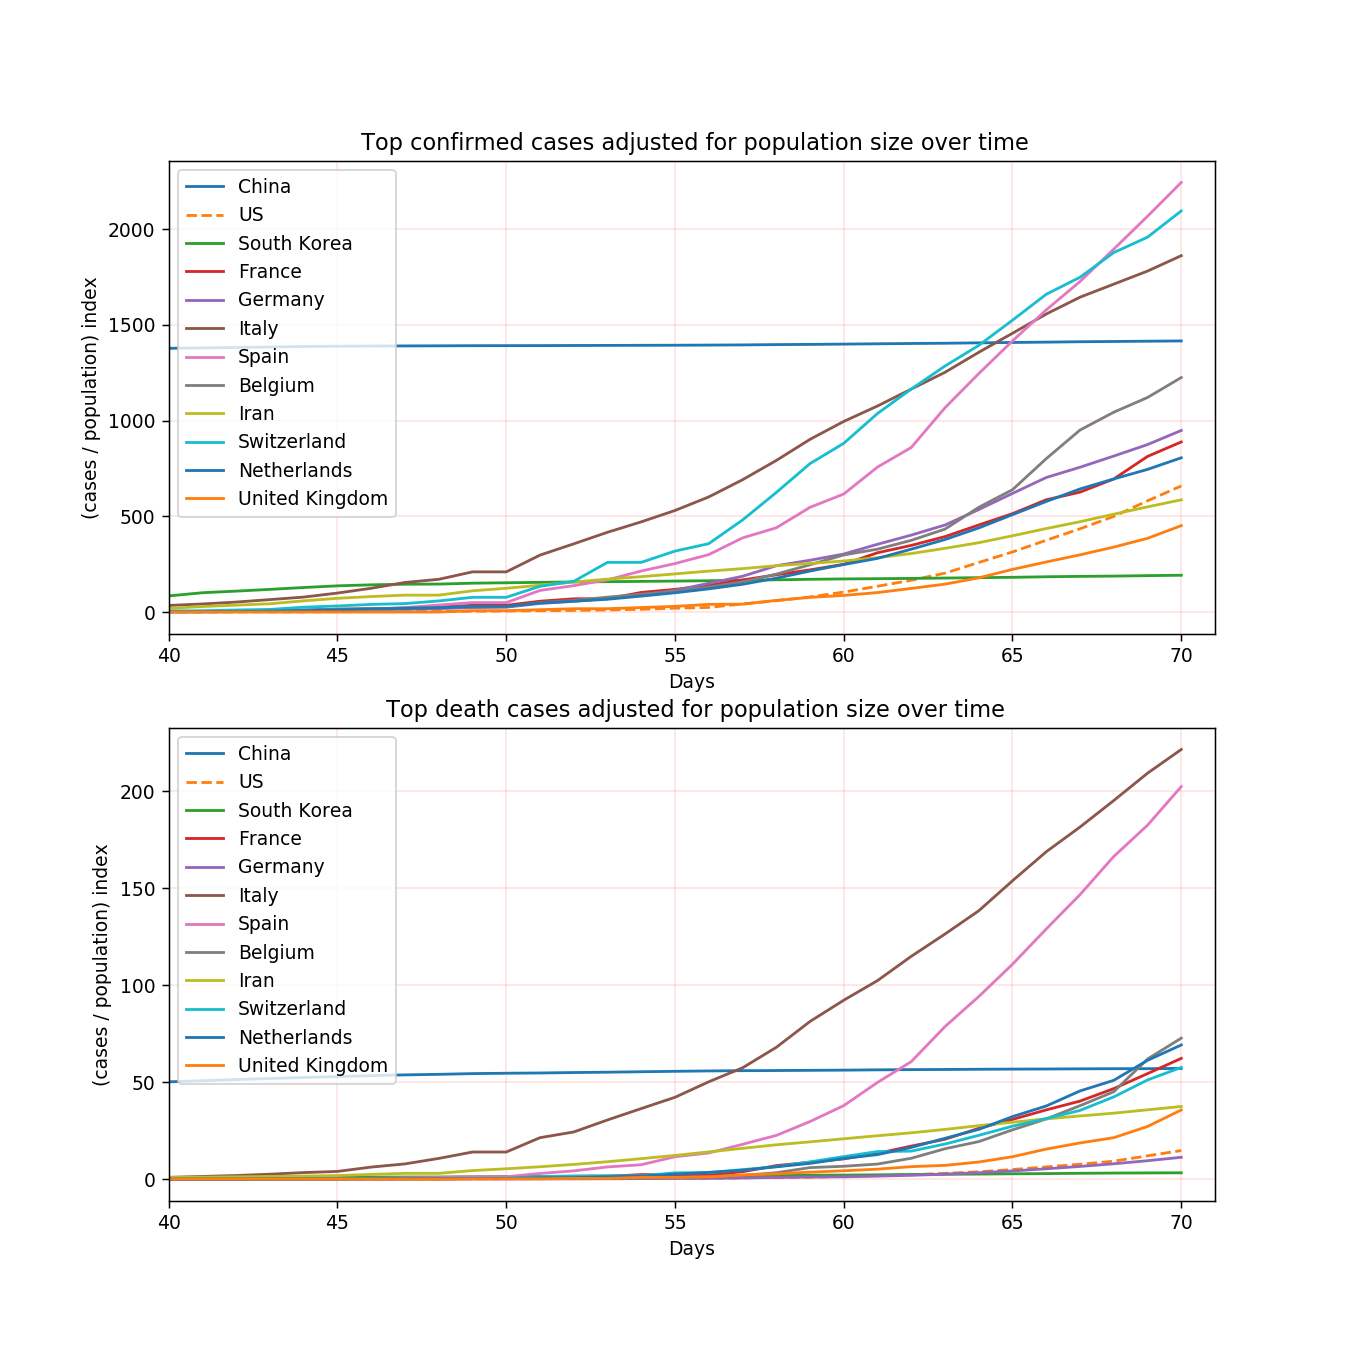

In [49]:
fig, ax = plt.subplots(2, figsize = (10,10))  

ax[0].set_xlim(40, days)
#ax[0].set_ylim(10, 100000)
ax[0].set_title(" Top confirmed cases adjusted for population size over time")
ax[0].set_ylabel("(cases / population) index")
ax[0].set_xlabel("Days")
ax[0].set_yscale('linear')


ax[1].set_xlim(40, days)
#ax[1].set_ylim(.1, 10000)
ax[1].set_title(" Top death cases adjusted for population size over time")
ax[1].set_ylabel("(cases / population) index")
ax[1].set_xlabel("Days")
ax[1].set_yscale('linear')

                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (str(population_dict.keys()).find(CNT) > 0):
        #if ("China"in CNT):
            x = range(0,len(country_conf_dict[CNT]))
            #x = dates
            y1 = country_conf_dict[CNT] /  population_dict[CNT]
            y2 = country_death_dict[CNT] /  population_dict[CNT]
            if ("US" in CNT):
                ax[0].plot(x,y1, label=CNT, linestyle='--')
                ax[1].plot(x,y2, label=CNT, linestyle='--')
            else:
                ax[0].plot(x,y1, label=CNT)
                ax[1].plot(x,y2, label=CNT)
            ax[0].grid(color='r', linestyle='-', linewidth=0.1)
            ax[1].grid(color='r', linestyle='-', linewidth=0.1)
            
ax[0].legend(loc="upper left")  
ax[1].legend(loc="upper left")  


In [ ]:
#####################################################################

Log plot

#####################################################################

<IPython.core.display.Javascript object>


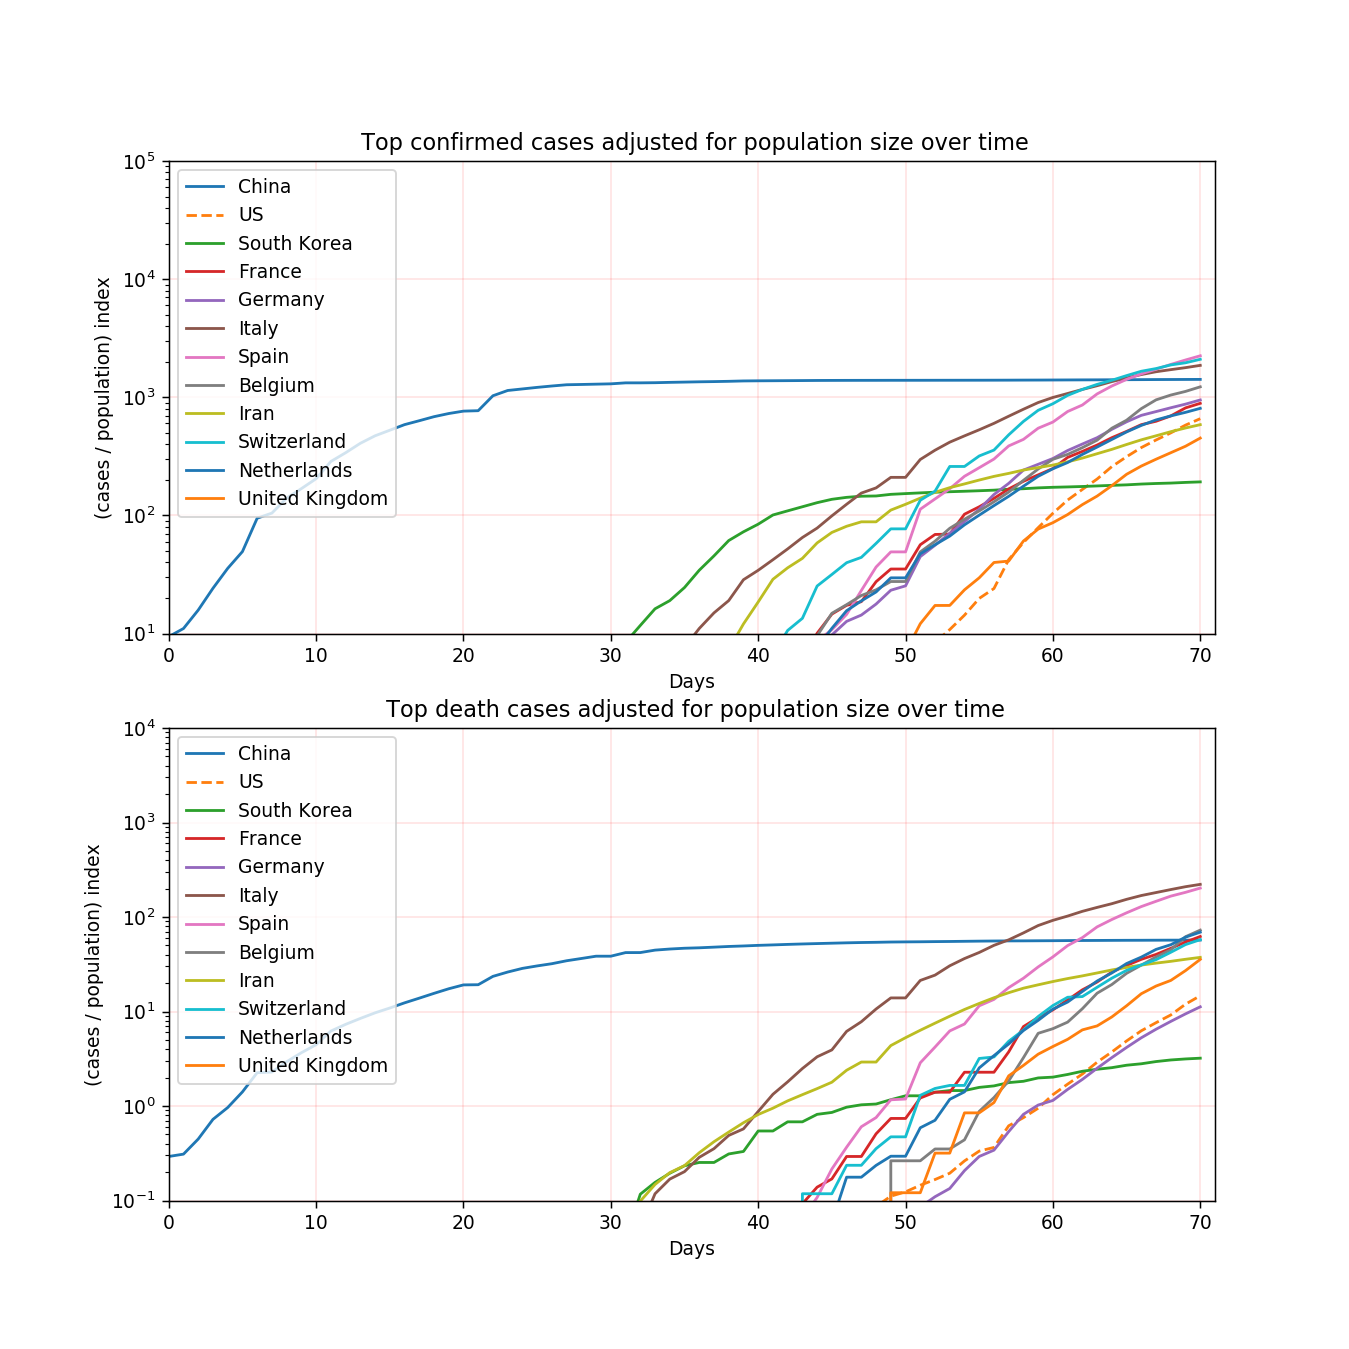

In [50]:
fig, ax = plt.subplots(2, figsize = (10,10))  

ax[0].set_xlim(0, days)
ax[0].set_ylim(10, 100000)
ax[0].set_title(" Top confirmed cases adjusted for population size over time")
ax[0].set_ylabel("(cases / population) index")
ax[0].set_xlabel("Days")
ax[0].set_yscale('log', basey=10)


ax[1].set_xlim(0, days)
ax[1].set_ylim(.1, 10000)
ax[1].set_title(" Top death cases adjusted for population size over time")
ax[1].set_ylabel("(cases / population) index")
ax[1].set_xlabel("Days")
ax[1].set_yscale('log', basey=10)
                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (str(population_dict.keys()).find(CNT) > 0):
        #if ("China"in CNT):
            x = range(0,len(country_conf_dict[CNT]))
            y1 = country_conf_dict[CNT] /  population_dict[CNT]
            y2 = country_death_dict[CNT] /  population_dict[CNT]
            if ("US" in CNT):
                ax[0].plot(x,y1, label=CNT, linestyle='--')
                ax[1].plot(x,y2, label=CNT, linestyle='--')
            else:
                ax[0].plot(x,y1, label=CNT)
                ax[1].plot(x,y2, label=CNT)
                
            ax[0].grid(color='r', linestyle='-', linewidth=0.1)
            ax[1].grid(color='r', linestyle='-', linewidth=0.1)
            
ax[0].legend(loc="upper left")  
ax[1].legend(loc="upper left")  
    

<IPython.core.display.Javascript object>


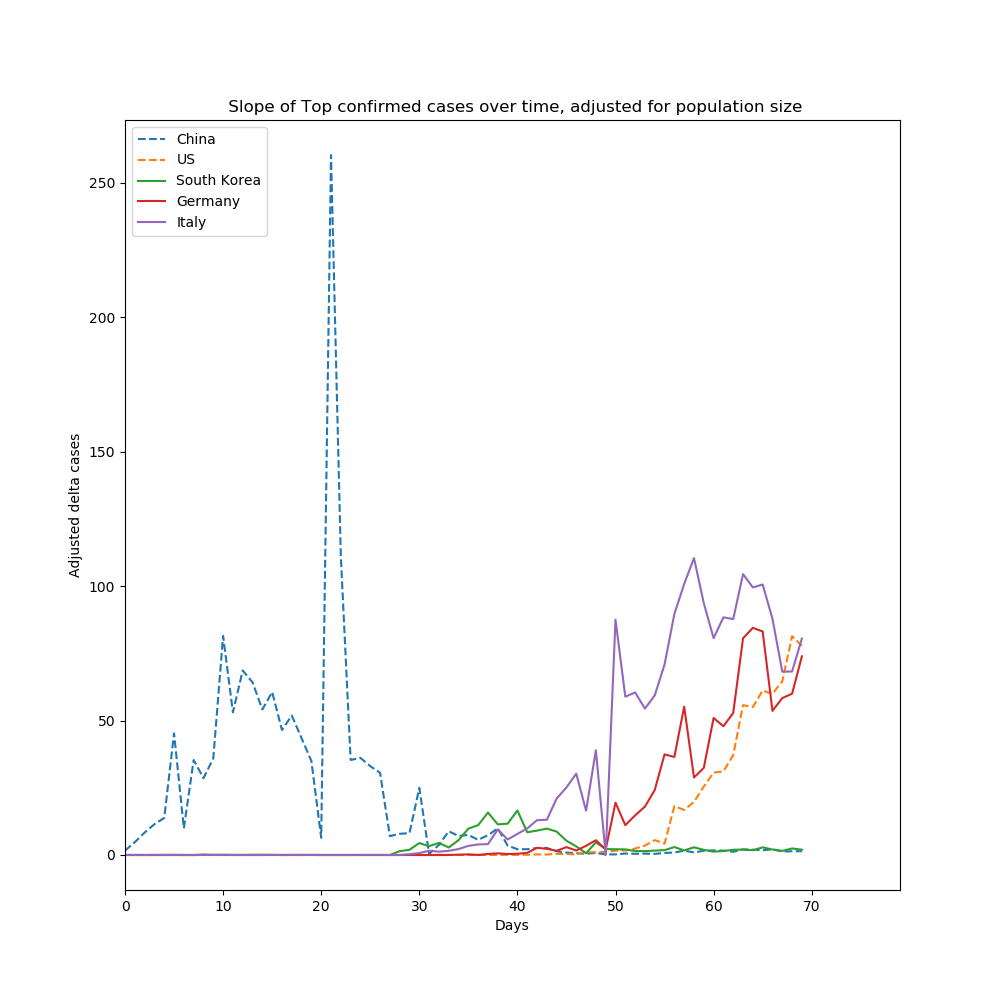

In [53]:
# Plot the deriavtive of the confirmed

fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Slope of Top confirmed cases over time, adjusted for population size")
ax.set_ylabel("Adjusted delta cases")
ax.set_xlabel("Days")

exclude_list = ['Iran', 'Iran (Islamic Republic of)']  
include_list = ['China', 'US', 'Italy', 'Germany', 'South Korea']
                        
# Daily total for all of the cities summed together
for CNT in Dcountry_conf_dict:
    #print(CNT)
    #if (Dcountry_conf_dict[CNT][days-2] > 0) and not(str(exclude_list).find(CNT)>=0): 
    if (str(include_list).find(CNT) > 0)  :
        x = range(0,len(Dcountry_conf_dict[CNT]))
        y = Dcountry_conf_dict[CNT]   /  population_dict[CNT]   
        if ("US" in CNT) or ("China" in CNT) or ("Itay" in CNT):
          ax.plot(x,y, label=CNT, linestyle='--')
        else:
            ax.plot(x,y, label=CNT)
        ax.grid
    
plt.legend(loc="upper left")  

In [110]:
import matplotlib.dates as mdates
from matplotlib import dates
import datetime

In [90]:
x = [datetime.date(2020,1,22) + datetime.timedelta(days=i) for i in range(63)]

In [91]:
print(x)

[datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), 

In [112]:
datetime.date(2020,1,22)

datetime.date(2020, 1, 22)

In [114]:
dates.date2num(  datetime.date(2020, 1, 22)  )

737446.0

In [115]:
dates.num2date(737447)

datetime.datetime(2020, 1, 23, 0, 0, tzinfo=datetime.timezone.utc)

In [63]:
for i in conf_dict.keys():
    #print(i)
    if (str(i).find("Florida") >= 0):
        print(i)
        print(conf_dict[i])

US-Florida
[[48, 15], [49, 28], [50, 35], [51, 50], [52, 76], [53, 115], [54, 155], [55, 216], [56, 314], [57, 417], [58, 563], [59, 659], [60, 227], [60, 217], [60, 72], [60, 58], [60, 39], [60, 38], [60, 35], [60, 33], [60, 33], [60, 26], [60, 24], [60, 19], [60, 16], [60, 15], [60, 14], [60, 14], [60, 13], [60, 11], [60, 11], [60, 8], [60, 8], [60, 7], [60, 7], [60, 6], [60, 5], [60, 5], [60, 5], [60, 4], [60, 4], [60, 4], [60, 3], [60, 3], [60, 2], [60, 2], [60, 2], [60, 2], [60, 2], [60, 1], [60, 1], [60, 1], [60, 1], [60, 1], [60, 1], [60, 1], [60, 1], [60, 1], [60, 1], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [60, 0], [61, 36], [61, 3], [61, 1], [61, 1], [61, 7], [61, 263], [61, 0], [61, 3], [61, 9], [61, 8], [61, 39], [61, 2], [61, 1], [61, 0], [61, 50], [61, 9], [61, 3], [61, 0], [61, 1], [61, 0], [61, 0], [61, 0], [61, 0], [61, 0]